In [65]:
import glob
import cv2
from matplotlib import pyplot as plt
import os

In [66]:
# Update the output folder before use
ouput_folder = '/home/xinzhi/Text-To-Video-Finetuning/output/unique_token_dog_only_1700608471/'

In [70]:
def ExtractTitle(file_path):
    file_name = os.path.basename(file_path)
    prompt = file_name.split('_')[0]
    iterations = file_name.split('_')[-1].split(' ')[0]
    title = "Prompt: " + prompt + " rendering at " + iterations + " iterations."
    return title

In [77]:
def ExtractFrames(file_path, sampling_rate = 1):
    cap = cv2.VideoCapture(file_path)
    frames = []
    index = -1
    while(cap.isOpened()):
        ret, frame = cap.read()
        index += 1
        if index % sampling_rate != 0:
            continue
        if frame is None or frame.size == 0:
            break
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        frames.append(rgb_frame)
    return frames
    

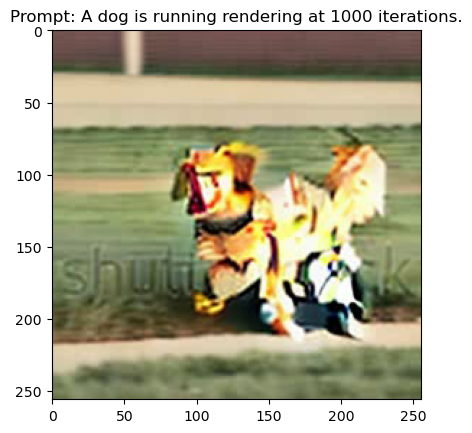

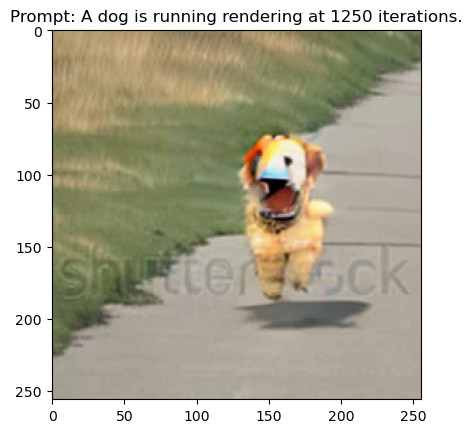

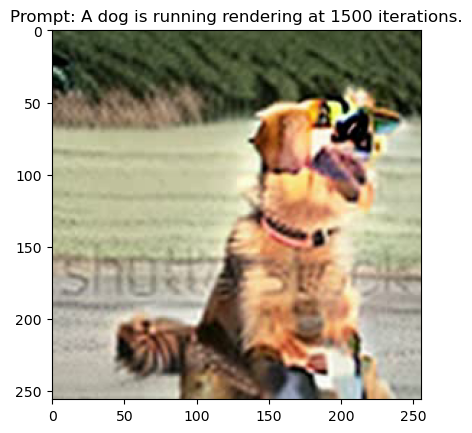

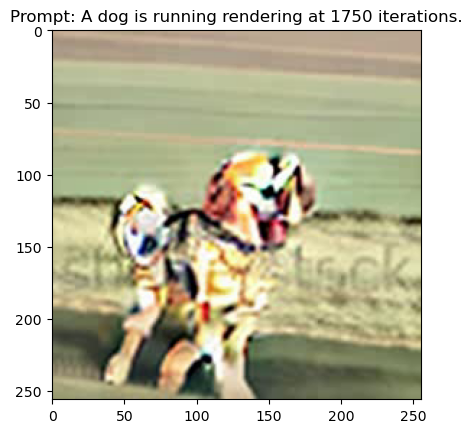

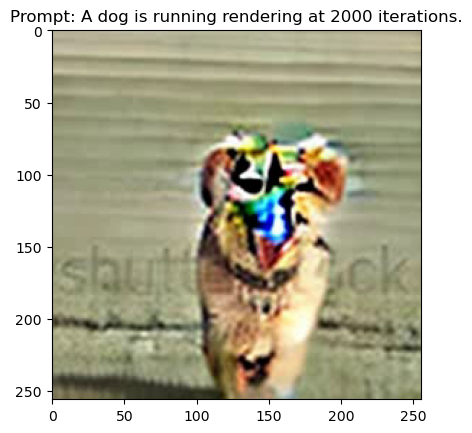

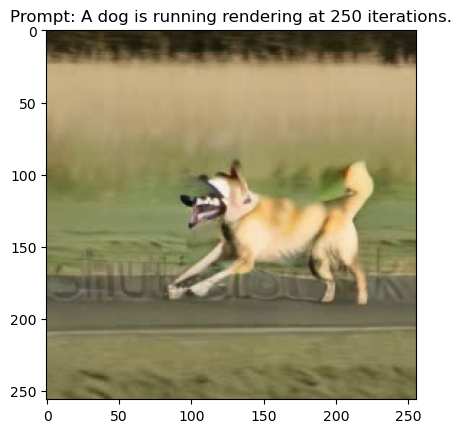

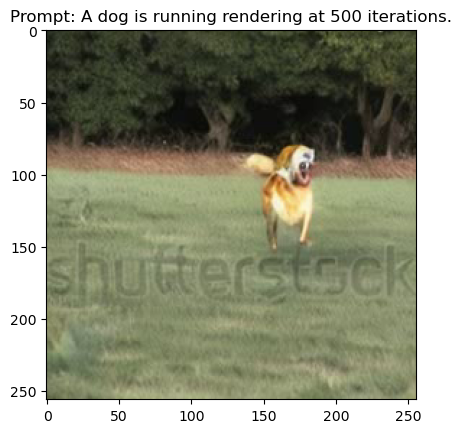

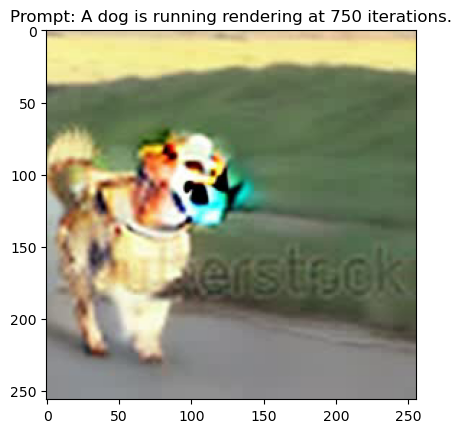

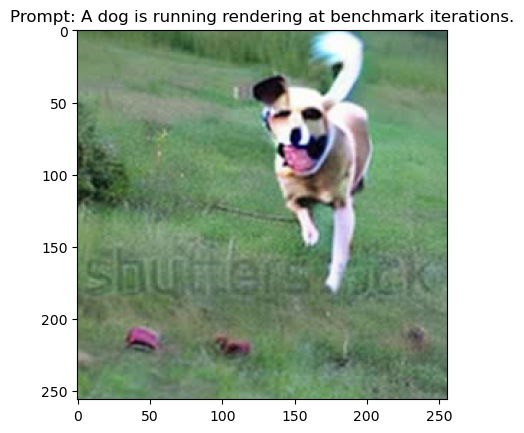

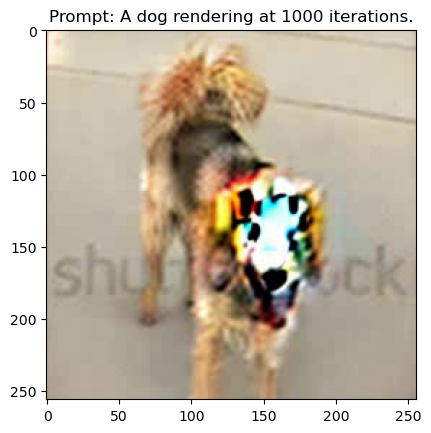

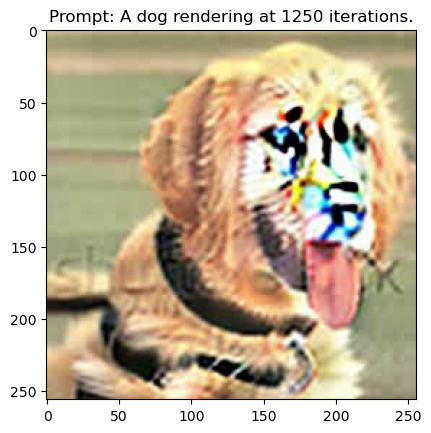

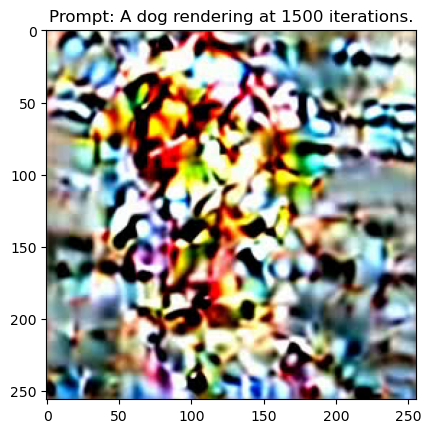

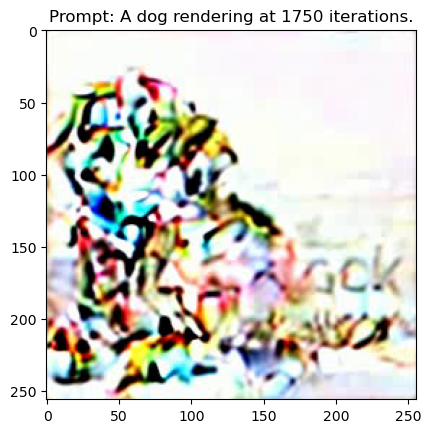

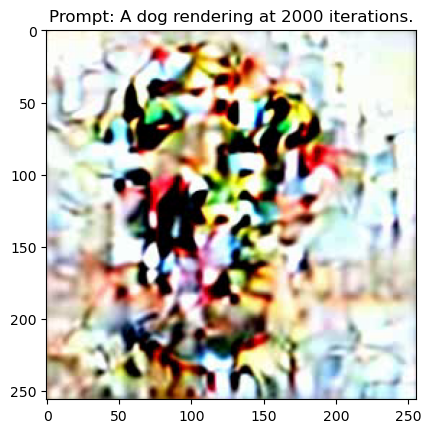

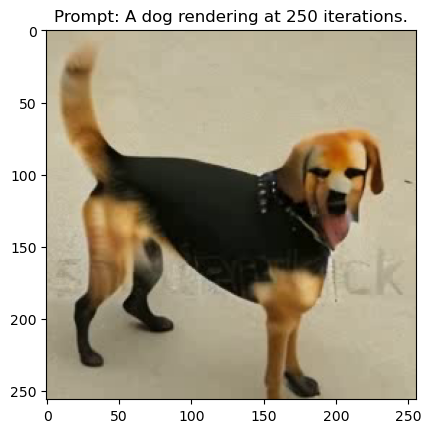

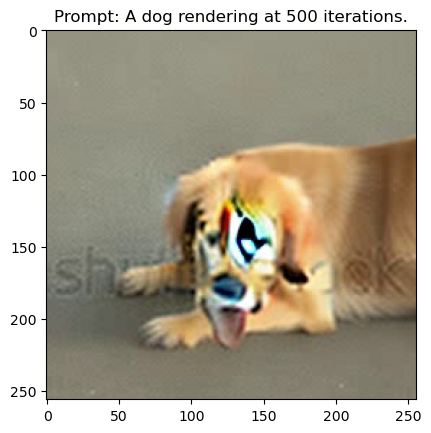

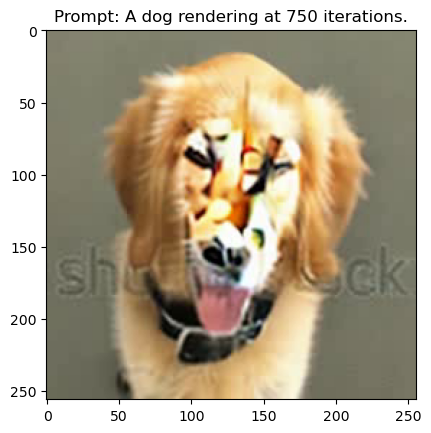

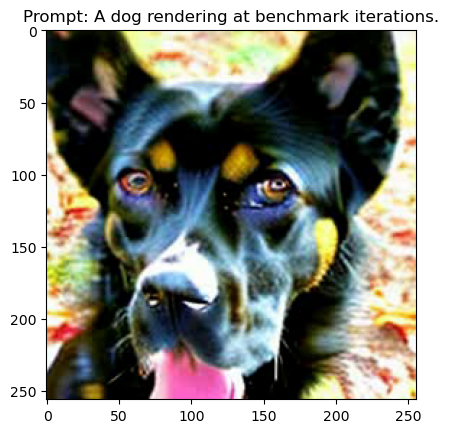

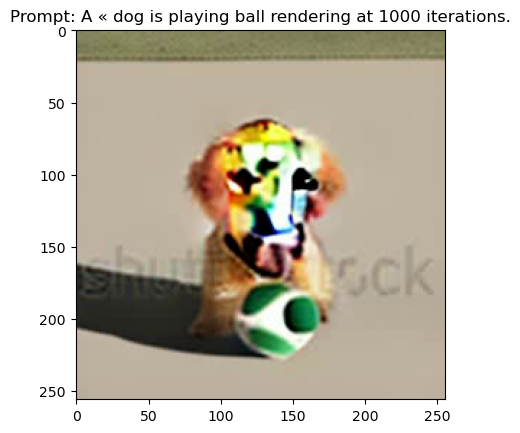

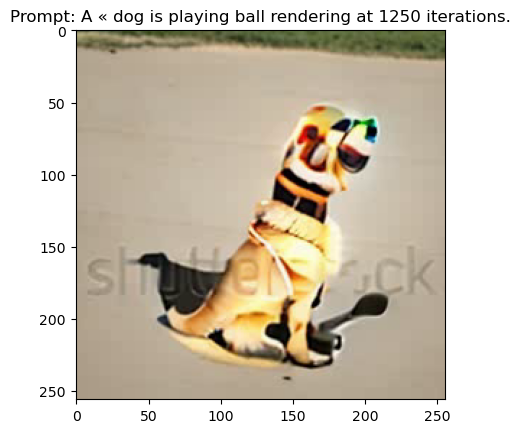

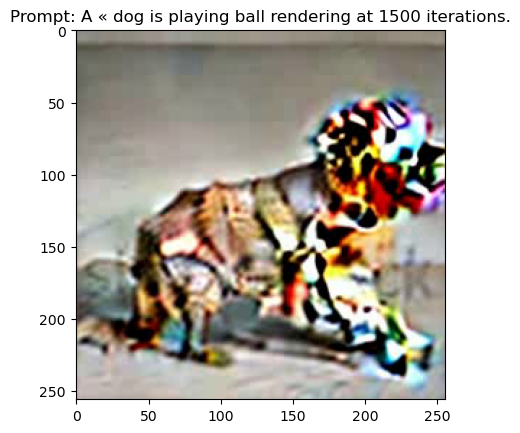

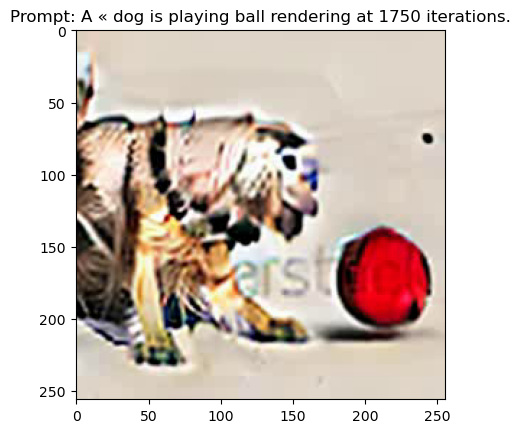

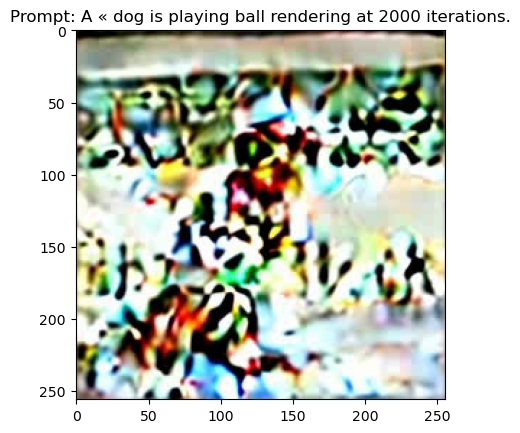

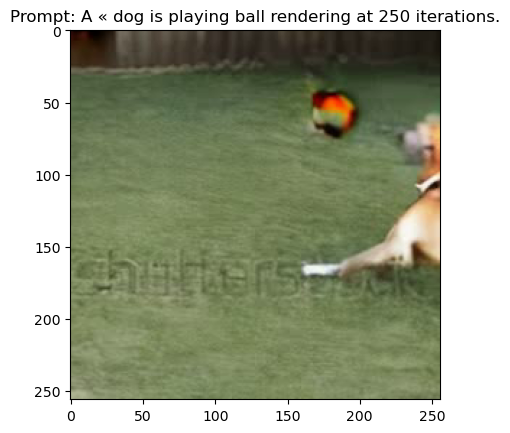

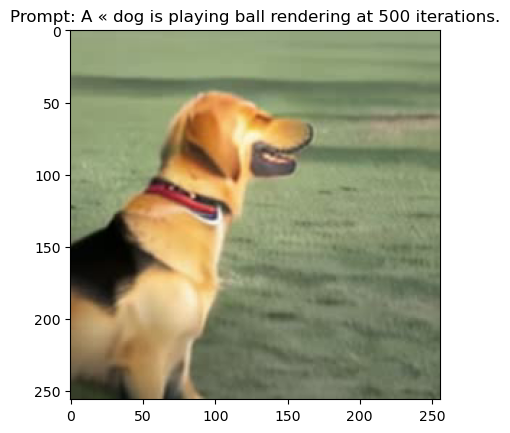

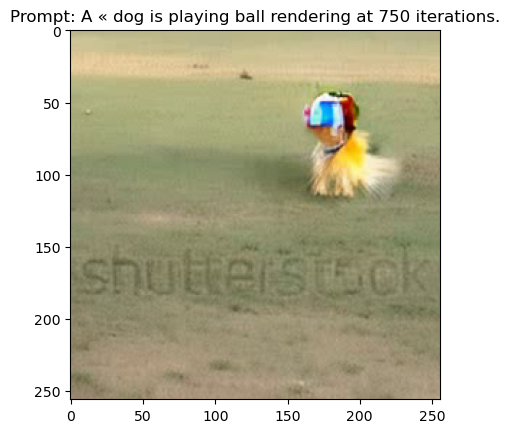

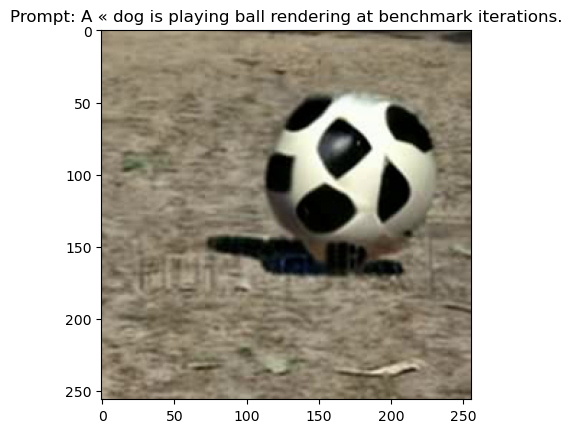

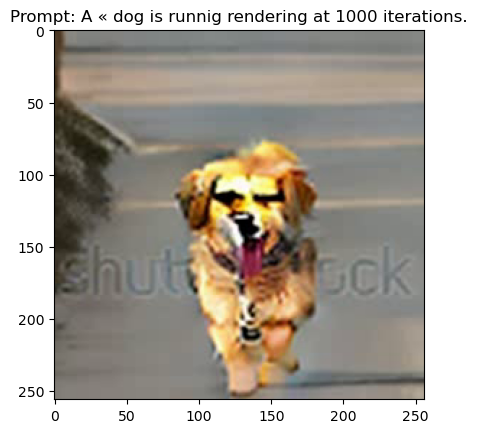

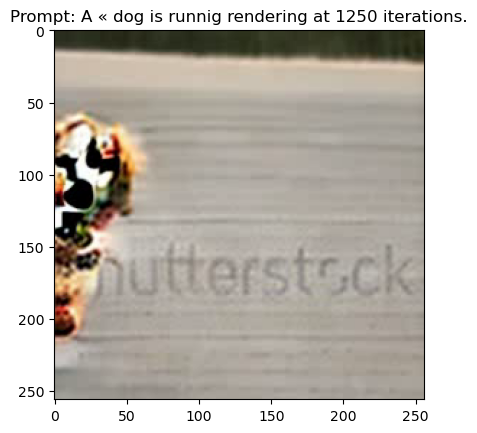

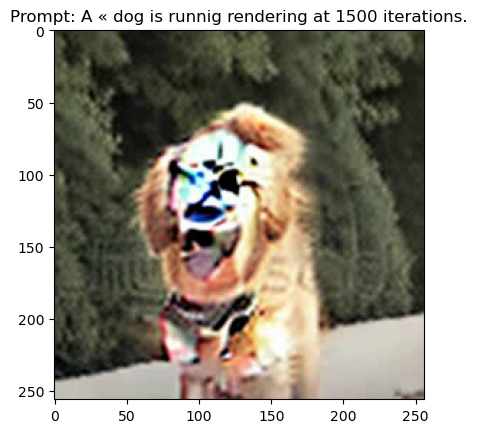

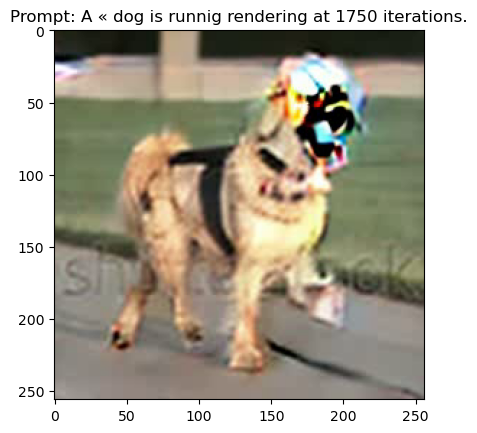

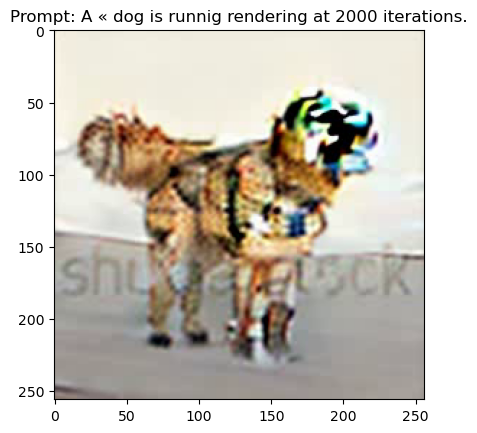

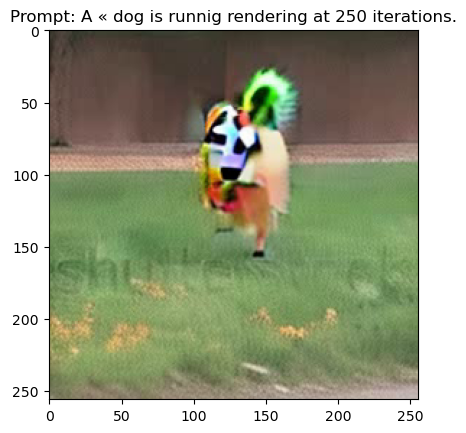

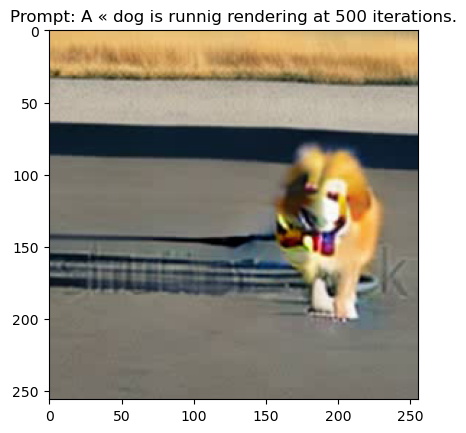

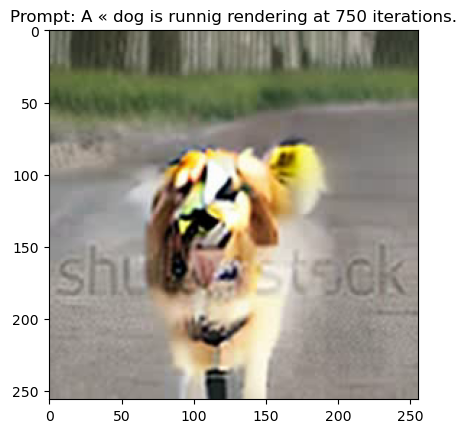

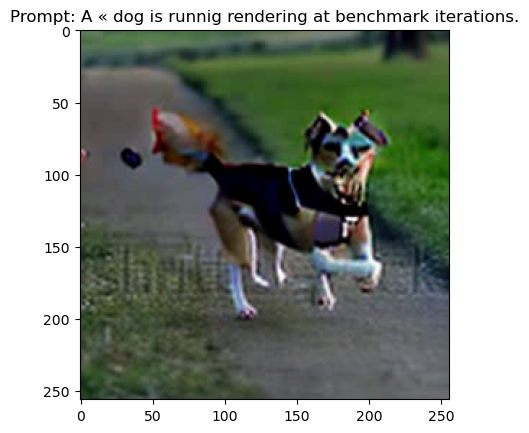

In [78]:
video_files = glob.glob(ouput_folder + '*')
video_files.sort()
for file_path in video_files: 
    title = ExtractTitle(file_path)
    frames = ExtractFrames(file_path, sampling_rate= 50)
    for frame in frames:
        plt.imshow(frame)
        plt.title(title)
        plt.show()